In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# importing Datasets

In [2]:
URL="dataset/Information.csv"
data_initial =pd.read_csv(URL,encoding='ISO-8859-1')
data_initial.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [3]:
data_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [4]:
data_initial.description.head()

0                                i sing my own rhythm.
1    I'm the author of novels filled with family dr...
2                  louis whining and squealing and all
3    Mobile guy.  49ers, Shazam, Google, Kleiner Pe...
4    Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
Name: description, dtype: object

In [5]:
data_initial.text.head()

0    Robbie E Responds To Critics After Win Against...
1    ÛÏIt felt like they were my friends and I was...
2    i absolutely adore when louis starts the songs...
3    Hi @JordanSpieth - Looking at the url - do you...
4    Watching Neighbours on Sky+ catching up with t...
Name: text, dtype: object

# Data Cleaning

In [6]:
data=pd.read_csv(URL,encoding='ISO-8859-1',
                 usecols=["gender","gender:confidence","profile_yn","profile_yn:confidence","description","text"],
                na_values=["not_available","NA",'nan','na','unavailable','unknown',-1])
data.head()

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text
0,male,1.0000,yes,1.0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...
1,male,1.0000,yes,1.0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...
2,male,0.6625,yes,1.0,louis whining and squealing and all,i absolutely adore when louis starts the songs...
3,male,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...
4,female,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...


In [7]:
data.describe()

,gender:confidence,profile_yn:confidence
count,20024.000000,20050.000000
mean,0.882756,0.993221
std,0.191403,0.047168
min,0.000000,0.627200
25%,0.677800,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [8]:
data["gender"].unique()

array(['male', 'female', 'brand', nan], dtype=object)

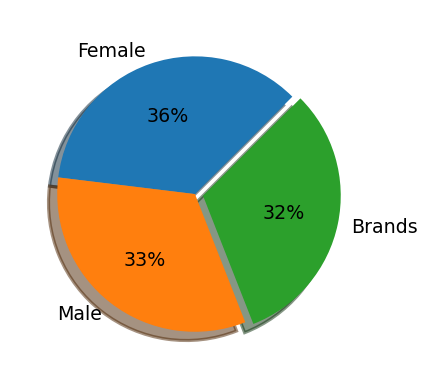

In [9]:
#pie chart visualisation of category of Users
users=data.gender.value_counts()
male_users_1=users["male"]
female_users_1=users["female"]
brand_1=users["brand"]

gender=["Female","Male","Brands"]
size=[female_users_1,male_users_1,brand_1]

plt.figure(figsize=(2,2),dpi=228)

plt.pie(size,labels=gender,explode=[0,0,0.06],textprops={'fontsize':6},startangle=45,autopct='%1.0f%%',shadow=True)

plt.show()

In [10]:
users

female    6700
male      6194
brand     5942
Name: gender, dtype: int64

In [11]:
data[data["gender"] == "brand"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5942 entries, 6 to 20042
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 5942 non-null   object 
 1   gender:confidence      5942 non-null   float64
 2   profile_yn             5942 non-null   object 
 3   profile_yn:confidence  5942 non-null   float64
 4   description            4328 non-null   object 
 5   text                   5942 non-null   object 
dtypes: float64(2), object(4)
memory usage: 325.0+ KB


In [12]:
data=data[data.gender != "brand"]
data

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text
0,male,1.0000,yes,1.0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...
1,male,1.0000,yes,1.0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...
2,male,0.6625,yes,1.0,louis whining and squealing and all,i absolutely adore when louis starts the songs...
3,male,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...
4,female,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...
...,...,...,...,...,...,...
20045,female,1.0000,yes,1.0,(rp),"@lookupondeath ...Fine, and I'll drink tea too..."
20046,male,1.0000,yes,1.0,"Whatever you like, it's not a problem at all. ...",Greg Hardy you a good player and all but don't...
20047,male,1.0000,yes,1.0,#TeamBarcelona ..You look lost so you should f...,You can miss people and still never want to se...
20048,female,0.8489,yes,1.0,Anti-statist; I homeschool my kids. Aspiring t...,@bitemyapp i had noticed your tendency to pee ...


In [13]:
#don't touch this cell
print(data.shape)
data.dropna(inplace=True)

(14108, 6)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11194 entries, 0 to 20049
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 11194 non-null  object 
 1   gender:confidence      11194 non-null  float64
 2   profile_yn             11194 non-null  object 
 3   profile_yn:confidence  11194 non-null  float64
 4   description            11194 non-null  object 
 5   text                   11194 non-null  object 
dtypes: float64(2), object(4)
memory usage: 612.2+ KB


# Data Validation

In [15]:
data.isnull().any()

gender                   False
gender:confidence        False
profile_yn               False
profile_yn:confidence    False
description              False
text                     False
dtype: bool

In [16]:
data.isna().any()

gender                   False
gender:confidence        False
profile_yn               False
profile_yn:confidence    False
description              False
text                     False
dtype: bool

In [17]:
data[data["gender:confidence"]==0]

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text


In [18]:
data[data["description"].str.len() == 0]

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text


In [19]:
data[data["text"].str.len() == 0]

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text


# Data Preprocessing

#### Label Encoding :  <br><br>["male" ,"yes"] -> 1 and<br><br> ["Female","no"] -> 0

In [20]:
data.gender.replace({"male":1,"female":0},inplace=True)
data.profile_yn.replace({"yes":1,"no":0},inplace=True)

In [21]:
data.head()

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text
0,1,1.0000,1,1.0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...
1,1,1.0000,1,1.0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...
2,1,0.6625,1,1.0,louis whining and squealing and all,i absolutely adore when louis starts the songs...
3,1,1.0000,1,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...
4,0,1.0000,1,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...


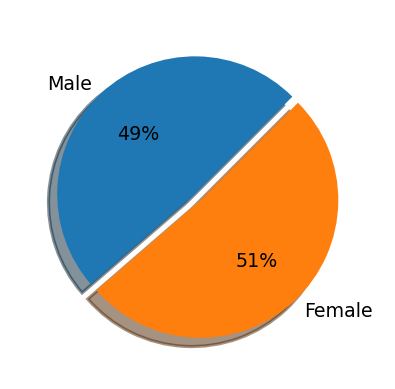

In [22]:
#pie chart visualisation of male users and female users
users=data.gender.value_counts()
male_users=users[1]
female_users=users[0]

gender=["Male","Female"]
size=[male_users,female_users]

plt.figure(figsize=(2,2),dpi=228)

plt.pie(size,labels=gender,explode=[0,0.06],textprops={'fontsize':6},startangle=45,autopct='%1.0f%%',shadow=True)

plt.show()

In [23]:
#pt=sns.FacetGrid(data,col='profile_yn:confidence')
#pt.map(plt.hist, 'gender', bins=20)
#plt.show()

In [24]:
ind=pd.Series(range(data.shape[0]))
data.set_index(ind,inplace=True)
data
#data.tail()

,gender,gender:confidence,profile_yn,profile_yn:confidence,description,text
0,1,1.0000,1,1.0,i sing my own rhythm.,Robbie E Responds To Critics After Win Against...
1,1,1.0000,1,1.0,I'm the author of novels filled with family dr...,ÛÏIt felt like they were my friends and I was...
2,1,0.6625,1,1.0,louis whining and squealing and all,i absolutely adore when louis starts the songs...
3,1,1.0000,1,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",Hi @JordanSpieth - Looking at the url - do you...
4,0,1.0000,1,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,Watching Neighbours on Sky+ catching up with t...
...,...,...,...,...,...,...
11189,0,1.0000,1,1.0,(rp),"@lookupondeath ...Fine, and I'll drink tea too..."
11190,1,1.0000,1,1.0,"Whatever you like, it's not a problem at all. ...",Greg Hardy you a good player and all but don't...
11191,1,1.0000,1,1.0,#TeamBarcelona ..You look lost so you should f...,You can miss people and still never want to se...
11192,0,0.8489,1,1.0,Anti-statist; I homeschool my kids. Aspiring t...,@bitemyapp i had noticed your tendency to pee ...


### Natural Language Processing

In [25]:
from sklearn.preprocessing import normalize
#download punkt and wordnet if its your First time :) else ignore
#nltk.download('punkt')
#nltk.download('wordnet')

In [26]:
# you cal also download from nltk.download('stopwords') then stop_words=set(stopwords.words('english'))
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [27]:
#important functions for removing unusual words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re

In [28]:
#initilize
lammitizer=WordNetLemmatizer()
stemmer=PorterStemmer()

In [29]:
#working
sentance="Hola ! We are Venom and we are here to protect you (Scrcasm) Hope you will enjoy with us. BTW We are Kidding"
sentance=re.sub(r'[!,.@#$%&<>?:;()]',"",sentance)
words=word_tokenize(sentance)
words

['Hola',
 'We',
 'are',
 'Venom',
 'and',
 'we',
 'are',
 'here',
 'to',
 'protect',
 'you',
 'Scrcasm',
 'Hope',
 'you',
 'will',
 'enjoy',
 'with',
 'us',
 'BTW',
 'We',
 'are',
 'Kidding']

In [30]:
#removing Stopwords
filtered_words =[word for word in words if not word in stopwords]
filtered_words

['Hola',
 'We',
 'Venom',
 'protect',
 'Scrcasm',
 'Hope',
 'will',
 'enjoy',
 'us',
 'BTW',
 'We',
 'Kidding']

In [31]:
#removing punctuations 
final_words=[stemmer.stem(word) for word in filtered_words]
final_words

['hola',
 'We',
 'venom',
 'protect',
 'scrcasm',
 'hope',
 'will',
 'enjoy',
 'us',
 'btw',
 'We',
 'kid']

In [32]:
def cleaning2(message):
    message = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                     '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', message)
    message = re.sub("(@[A-Za-z0-9_]+)","", message)
    words=message.split()
    filtered_words =[stemmer.stem(word.lower()) for word in words if not word.lower() in stopwords]
    return filtered_words


In [33]:
#final message
def cleaning(message):
    message = re.sub(r'([!,.@$%&<>?:;()+-/^0-9|]+)|(http\S+)|(#\S+)', '', message)
    message=re.sub(r'[#@]\S+',"",message)
    message=re.sub(r'\.',"",message)
    #words=word_tokenize(message)
    words=message.split()
    filtered_words =[stemmer.stem(word.lower()) for word in words if not word.lower() in stopwords]
    return filtered_words
#cleaning(sentance)

In [34]:
def flattern(Series):
    '''
    input : series/2d array
    output : list
    '''
    flat=[]
    for i in Series:
        for j in i:
            flat.append(j)
    return flat

In [35]:
#regex testing
temp=data.text[1]
cleaning(temp)

['\x89ûïit', 'felt', 'like', 'friend', 'live', 'stori', 'them\x89û\x9d']

In [36]:
# \x89ÛÏIt is not removing by the RE ....... Mercy and Help me :>(
data.text[1]

'\x89ÛÏIt felt like they were my friends and I was living the story with them\x89Û\x9d https://t.co/arngE0YHNO #retired #IAN1 https://t.co/CIzCANPQFz'

In [37]:
#combining B
data["Combine"]=data.description+" "+data.text

In [38]:
full_data=data.Combine.apply(cleaning)


In [45]:
full_data.shape

(11194, 49)

In [39]:
#Step 1 : Create a Dictonary Of All Words
all_words= flattern(full_data)
len(all_words)

188573

In [72]:
#print(len(all_words))
unique_words = pd.Series(all_words).value_counts()
unique_words[2500:2600]

supernatur    11
pronoun       11
gig           11
vip           11
restaur       11
              ..
analysi       10
van           10
sarah         10
crew          10
nick          10
Length: 100, dtype: int64

In [51]:
#after getting intuation from above lets reduce the vocab size to 2500
VOCAB_SIZE=2500

In [53]:
frequent_words = unique_words[:VOCAB_SIZE]

In [62]:
index=pd.Series(range(0,VOCAB_SIZE))
vocab_dict=pd.DataFrame({"word":frequent_words.index.values},index=index)
vocab_dict.index.name="word_id"
vocab_dict

,word
word_id,
0,love
1,just
2,like
3,not
4,get
...,...
2495,tower
2496,milk
2497,coat


In [73]:
vocab_dict.iloc[1500]

word    humor
Name: 1500, dtype: object

# Split  Test-train Data

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
full_data=pd.DataFrame.from_records(full_data)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(full_data, data.gender, test_size=0.30, random_state=42)

In [43]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
1922,sheher,probabl,watch,kitchen,nightmar,reallysulk,m,suspens,None,None,...,None,None,None,None,None,None,None,None,None,None
7359,û¢,zrc,everyth,see,zach,go,hug,never,let,go,...,None,None,None,None,None,None,None,None,None,None
9950,love,jesu,area,rep,fca,midcoast,southern,main,husband,denis,...,None,None,None,None,None,None,None,None,None,None
8008,madafuck,will,never,satisfi,lose,mind,freckl,face,lol,take,...,None,None,None,None,None,None,None,None,None,None
3948,¯¢¯¨¯±,¯_ô,¯©,ôöôà¯¬ôâôä,ôéôàô,¯ø¯_,ôé¯øô,ôä,¯¤ô,¯«¯¤¯á,...,None,None,None,None,None,None,None,None,None,None


In [44]:
y_train.head()

1922    0
7359    0
9950    1
8008    1
3948    1
Name: gender, dtype: int64

# Create A Sparse Matrix for Training Data

In [90]:
#we can also use dict / array but Index of Pandas is easy to Manage
word_index = pd.Index(vocab_dict.word)
type(word_index[3]) 

str

In [91]:
word_index.get_loc('fuck')

39

In [98]:
vocab_dict[vocab_dict.word=='fuck']

,word
word_id,
39,fuck


In [144]:
import sys

def making_Sparse(data,indexes,labels):
    '''
    Let Me tell You Something Gaurav:
    
    data : dataframe /Independent Variable/ containing all words i.e for this project X_test,X_train
    labels :Dependent Variable /Answers i.e for this project Y_test, Y_train
    indexes : Word Dict Indexes which contain words with index 
    '''
    exit=10
    tot_rows = data.shape[0]
    tot_cols = data.shape[1]
    temp_dict = []
    word_set = set(indexes)
    for row in range(tot_rows):
        for col in range(tot_cols):
            single_word = data.iat[row,col]
            
            if single_word in word_set:
                exit-=1
                doc_id = data.index[row]
                category = labels.at[doc_id]
                word_id = indexes.get_loc(single_word)
                item = {'LABEL': category, 'DOC_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                
                temp_dict.append(item)
                #print(temp_dict)
                
    #final_sparse_matrics =pd.DataFrame(temp_dict)
    return pd.DataFrame(temp_dict)

In [145]:
%%time
sparse_train_df = making_Sparse(X_train, word_index, y_train)

CPU times: user 18.3 s, sys: 23.3 ms, total: 18.3 s
Wall time: 18.3 s


In [146]:
sparse_train_df.shape

(92763, 4)

In [117]:
X_train.iat[0,1] in word_index

True

In [119]:
X_train.index[0]

1922

In [121]:
y_train.at[X_train.index[0]]

0

In [126]:
word_index.get_loc('probabl')

229

In [124]:
X_train.iat[0,1]

'probabl'

In [149]:
sparse_train_df.tail()

,LABEL,DOC_ID,OCCURENCE,WORD_ID
92758,0,7270,1,115
92759,0,7270,1,6
92760,0,7270,1,90
92761,0,7270,1,965
92762,0,7270,1,3


In [152]:
train_grouped = sparse_train_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped.head()

OCCURENCE
DOC_ID WORD_ID LABEL           
1      2       1              1
       17      1              1
       50      1              1
       91      1              1
       167     1              1

In [153]:
train_grouped = train_grouped.reset_index()
train_grouped.head()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,1,2,1,1
1,1,17,1,1
2,1,50,1,1
3,1,91,1,1
4,1,167,1,1
